# <center>Python Libraries Demo</center>
<center>
Author : Srikanta Patra
</center>
<hr />
<b>
<div style="color:Blue;">
* <a href="http://pandas.pydata.org/">Pandas</a>
* <a href="https://matplotlib.org/">Matplotlib</a>
* <a href="https://seaborn.pydata.org/">Seaborn</a>
* <a href="http://www.numpy.org/">NumPy</a>
* <a href="https://scipy.org/">SciPy</a>
* <a href="http://scikit-learn.org/stable/index.html">Scikit-Learn</a>
</div>
</b>

## Pandas

In [8]:
import pandas as pd
% matplotlib inline

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
print (df['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


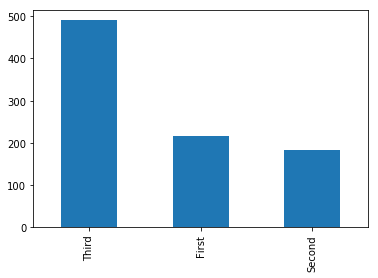

In [27]:
df.Pclass.map({1:'First', 2: 'Second', 3:'Third'}).value_counts().plot(kind='bar')


In [33]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [41]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Matplotlib

In [120]:
import matplotlib.pyplot as plt
plt.style.use(plt.style.available[1])

In [95]:
fare_by_class_and_sex = df.groupby(['Pclass', 'Sex'])['Fare'].mean()
fare_by_class_and_sex

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

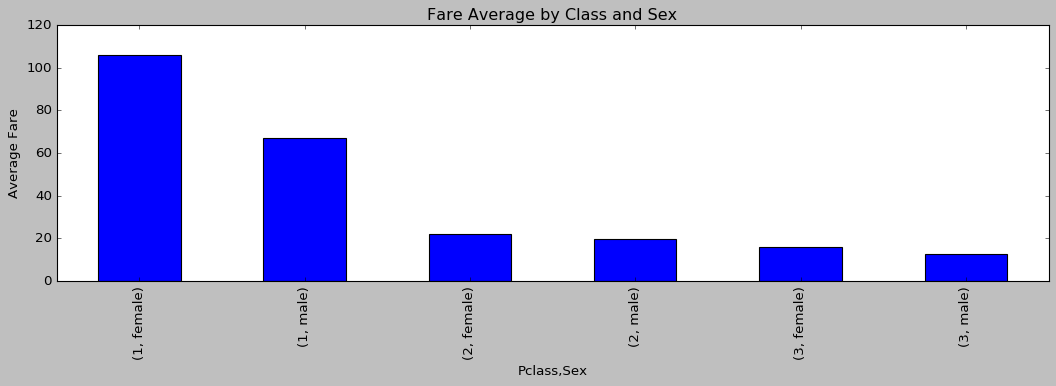

In [122]:
fig, ax = plt.subplots()
ax = fare_by_class_and_sex.plot.bar(figsize=(16,4), title='Fare Average by Class and Sex')
ax.set_ylabel('Average Fare')

## Seaborn

In [123]:
import seaborn as sns

C:\Users\spatra\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


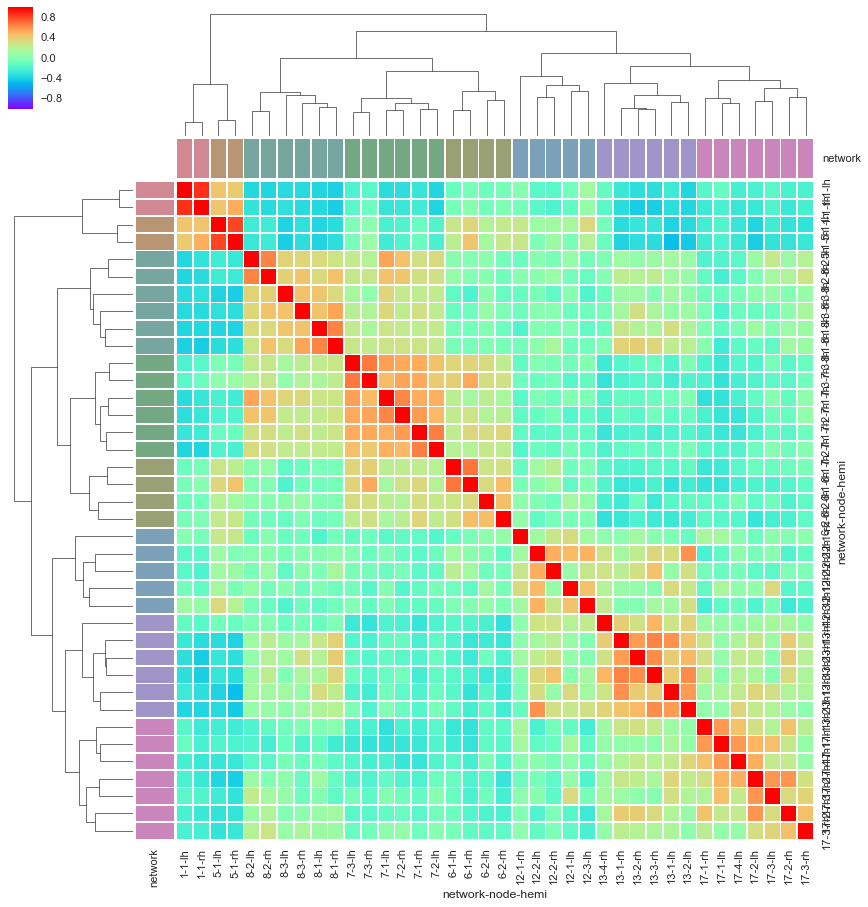

In [125]:
##############################################################
##############################################################
######################### CLUSTER MAP ########################
##############################################################
##############################################################

sns.set()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
sns.clustermap(df.corr(), center=0, cmap="rainbow",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

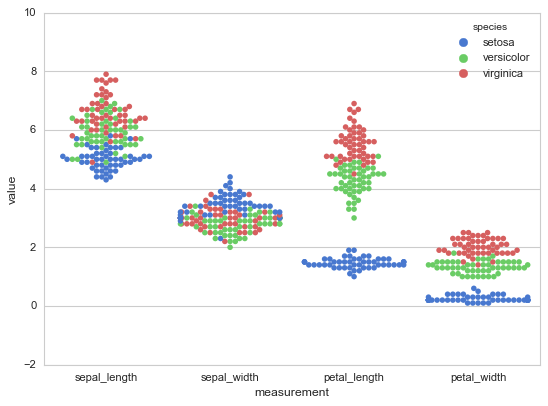

In [126]:
##############################################################
##############################################################
######################### SWARM PLOT #########################
##############################################################
##############################################################

sns.set(style="whitegrid", palette="muted")

# Load the example iris dataset
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)

## NUMPY

In [127]:
import numpy as np

In [132]:
##############################################################
##############################################################
#################### DIFFERENCE BETWEEN ######################
####################### PYTHON LIST ##########################
########################     &      ##########################
####################### NUMPY ARRAY ##########################
##############################################################
##############################################################

lst1 = [1,2,3,4,5,6]
lst2 = [7,8,9,10,11,12]
print ('----------Python List----------')
print (lst1 + lst2)
print ('\n')

np_array_1 = np.array(lst1)
np_array_2 = np.array(lst2)

print ('----------Numpy Array----------')
print (np_array_1 + np_array_2)

----------Python List----------
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


----------Numpy Array----------
[ 8 10 12 14 16 18]


In [143]:
##############################################################
##############################################################
#################### VARIOUS FUNCTIONS ######################
##############################################################
##############################################################

v = np.array([1,2,3])
w = np.array([1,0,1])
print ("The mean value of array 'v' %s" %np.average(v))
print("The cross product of Vector 'v' and Vector 'w' is: %s" %np.cross(v,w))
print ("The dot product of Vector 'v' and Vector 'w' is: %s" %np.dot(v,w))

The mean value of array 'v' 2.0
The cross product of Vector 'v' and Vector 'w' is: [ 2  2 -2]
The dot product of Vector 'v' and Vector 'w' is: 4


## SCIPY

In [158]:
##############################################################
##############################################################
################ SCIENTIFIC & MATH CONSTANTS #################
##############################################################
##############################################################

import scipy.constants
res = scipy.constants.physical_constants
constant_df = pd.DataFrame.from_dict(orient='index', data=res)
constant_df.index.name = 'Constant Name'
constant_df.columns = ['Value1', 'Unit', 'Value2']
constant_df.head(10)


,Value1,Unit,Value2
Constant Name,,,
Wien displacement law constant,2.897768e-03,m K,5.100000e-09
atomic unit of 1st hyperpolarizablity,3.206362e-53,C^3 m^3 J^-2,2.800000e-60
atomic unit of 2nd hyperpolarizablity,6.235381e-65,C^4 m^4 J^-3,1.100000e-71
atomic unit of electric dipole moment,8.478353e-30,C m,7.300000e-37
atomic unit of electric polarizablity,1.648777e-41,C^2 m^2 J^-1,1.600000e-49
atomic unit of electric quadrupole moment,4.486551e-40,C m^2,3.900000e-47
atomic unit of magn. dipole moment,1.854802e-23,J T^-1,1.600000e-30
atomic unit of magn. flux density,2.350518e+05,T,1.400000e-03
deuteron magn. moment,4.330735e-27,J T^-1,3.800000e-34


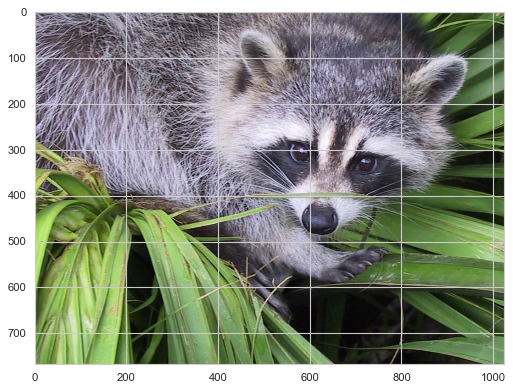

<function matplotlib.pyplot.show>

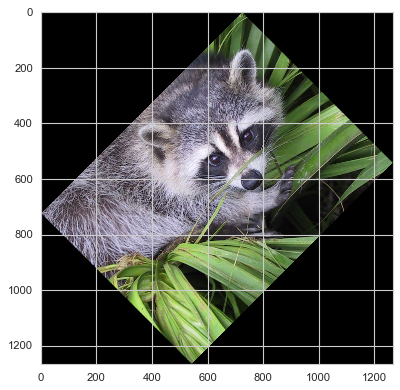

In [186]:
##############################################################
##############################################################
###################### IMAGE PROCESSING ######################
##############################################################
##############################################################

from scipy import misc,ndimage
face = misc.face()
rotate_face = ndimage.rotate(face, 45)

plt.imshow(face)

plt.show()
plt.imshow(rotate_face)
plt.show

## SkLearn

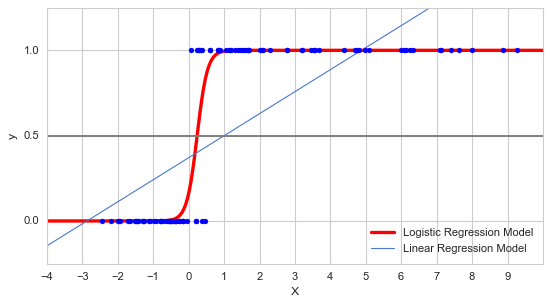

In [172]:
##############################################################
######################### SCIKIT-LEARN #######################
###################### LOGISTIC REGRESSION ###################
########################## EXAMPLE ###########################
##############################################################
# Code source: Gael Varoquaux
# License: BSD 3 clause

from sklearn import linear_model

# this is our test set, it's just a straight line with some
# Gaussian noise
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
# run the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(8, 4))
plt.clf()
plt.scatter(X.ravel(), y, color='blue', zorder=20)
X_test = np.linspace(-5, 10, 300)


def model(x):
    return 1 / (1 + np.exp(-x))
loss = model(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.show()